Paul O'Leary

Comp 4449 Capstone

11/19/2021

With Leigh Ann Kudloff

# "Suspense at the Preserve!"

## Final Feature Extractions and Model Runs, with metrics checked!



In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import timeit
import os

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import classification_report

import librosa 
import librosa.display
from scipy.io import wavfile as wav
import os, sys, cv2, matplotlib.pyplot as plt, numpy as np, shutil, itertools, pickle, pandas as pd, seaborn as sn, math, time
from random import seed, random, randint
from scipy.spatial import distance
import random
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
from mpl_toolkits.mplot3d import Axes3D
import soundfile as sf
from tqdm import tqdm
from keras import backend as K
from keras.models import Model, load_model, Sequential
from keras.callbacks import ModelCheckpoint
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import scikeras

import tensorflow
from tensorflow.keras.layers import LSTM, Dense, Dropout
import keras

from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf

import gc

from scipy import spatial


In [7]:
# Pull in the files created in PJO_Final.ipynb that include sound file paths

birds = pd.read_csv("Pauls_birds.csv")
testBirds = pd.read_csv("Pauls_testBirds.csv")

In [8]:
# Cut down birds to birds2 - with just A, B, C and D Quality recordings
birds2 = birds.loc[birds["Quality"].isin(["A", "B", "C", "D"])]

In [9]:
len(birds2)
# That leaves 2008 records. Still a lot.

2008

The next two blocks of code pull the MFCC features (mean'd and std's) and the Chroma-STFT features (mean'd and std'd) on the ABCD quality recordings from the vetted samples and ALL the Kasios Test files.  

## They are commented out to save from rerunning.  The pickles created are reloaded to save the time.

In [10]:
# # So now another big step back.  Create the list of clips FIRST,
# # Then process all of them

# # THIS IS THE TEST KASIOS FILES  HACKED

# # Remove silence from the audio, split into 2 second chunks

# X_test = []

# y_test = []

# # FOR TESTING lengths of the pieces
# mfcc_len = []
# stft_len = []

# bird_num = []

# frame_list = []

# for i in tqdm(range(len(testBirds))):  
    
#     # Read audio

#     curr = testBirds.iloc[i].wav_path
#     y, sr = librosa.load(curr)

#     # Normalize time series
#     y = ((y-np.amin(y))*2)/(np.amax(y) - np.amin(y)) - 1
    
#     # Remove silence
#     org_len = len(y)
#     intervals = librosa.effects.split(y, top_db = 15, ref = np.max)
#     intervals = intervals.tolist()
#     y = (y.flatten()).tolist()
#     sound_y = []

#     for p,q in intervals :
#         sound_y = sound_y + y[p:q+1] 

#     y = np.array(sound_y)
#     final_len = len(y)
#     silent = org_len - final_len
        
#     # Divide audio into frames
#     frame_len = 22050  
    
#     start = 0
#     end = frame_len
#     for j in range(0, len(y), int(frame_len*0.5)):  

#         frame = y[j:j+frame_len]
#         if len(frame) < frame_len :
#             frame = frame.tolist() + [0]* (frame_len-len(frame))
#         frame = np.array(frame)
        
#         frame_list.append(frame)
        
#         # Keep track of WHICH test site the recording is from
#         bird_num.append(testBirds.iloc[i].ID)
        

# # Now go through the newly created frame list and pull out the MFCC
# for ii in range(len(frame_list)):
    
#     S_list = []
        
#     # MFCC
#     mfcc = librosa.feature.mfcc(frame_list[ii], sr=sr, n_mfcc=25)

#     mfcc_mean = mfcc.mean(axis=1).T
#     mfcc_std = mfcc.std(axis=1).T
#     mfcc_feature = np.hstack([mfcc_mean, mfcc_std])

#     mfcc_len.append(len(mfcc_feature))

#     S_list.append(mfcc_feature)


#     stft = np.abs(librosa.stft(frame_list[ii]))
#     chroma_stft = librosa.feature.chroma_stft(S=stft, sr=sr, n_chroma=25)

#     stft_len.append(len(chroma_stft))

#     chroma_mean = chroma_stft.mean(axis=1).T
#     chroma_std = chroma_stft.std(axis=1).T
#     chroma_feature = np.hstack([chroma_mean, chroma_std]) 

#     S_list.append(chroma_feature)

#     X_test.append(S_list)

#     y_test.append(bird_num[ii])  

In [11]:
# # Now for the birds2 file with the changes.  How to keep track of the type of bird?

# # REWORK THIS.  Remove silence, 2 second chunks, then append more features!!

# # 

# # Remove silence from the audio, split into 2 second chunks

# #.    REWORK ALL THIS!!!
# X_train = []

# y_train = []

# frame_list = []
# bird_list = []

# # X_test = []
# # y_test = []

# frame_len = 22050  # 44100 is 2 seconds

# # Go through the BIRDs 2 files
# for i in tqdm(range(len(birds2))):

#     # Read audio

#     curr = birds2.iloc[i].wav_path
#     y, sr = librosa.load(curr)

#     # Normalize time series
#     y = ((y-np.amin(y))*2)/(np.amax(y) - np.amin(y)) - 1
    
#     # Remove silence
#     org_len = len(y)
#     intervals = librosa.effects.split(y, top_db = 15, ref = np.max)
#     intervals = intervals.tolist()
#     y = (y.flatten()).tolist()
#     sound_y = []

#     for p,q in intervals :
#         sound_y = sound_y + y[p:q+1] 

#     y = np.array(sound_y)
#     final_len = len(y)
#     silent = org_len - final_len
    
#     # Divide audio into frames
#     start = 0
#     end = frame_len
#     for j in range(0, len(y), int(frame_len*0.5)):  

#         frame = y[j:j+frame_len]
#         if len(frame) < frame_len :
#             frame = frame.tolist() + [0]* (frame_len-len(frame))
#         frame = np.array(frame)
        
#         frame_list.append(frame)
        
#         # Keep track of the bird name!
#         bird_list.append(birds2.iloc[i].English_name)

# # Now step through the frame list and pull out the features using librosa
# for ii in range(len(frame_list)):
    
#     S_list = []
        
#     # MFCC
#     mfcc = librosa.feature.mfcc(frame_list[ii], sr=sr, n_mfcc=25)

#     mfcc_mean = mfcc.mean(axis=1).T
#     mfcc_std = mfcc.std(axis=1).T
#     mfcc_feature = np.hstack([mfcc_mean, mfcc_std])

#     # mfcc_len.append(len(mfcc_feature))

#     S_list.append(mfcc_feature)

#     stft = np.abs(librosa.stft(frame_list[ii]))
#     chroma_stft = librosa.feature.chroma_stft(S=stft, sr=sr, n_chroma=25)

#     stft_len.append(len(chroma_stft))

#     chroma_mean = chroma_stft.mean(axis=1).T
#     chroma_std = chroma_stft.std(axis=1).T
#     chroma_feature = np.hstack([chroma_mean, chroma_std]) 

#     S_list.append(chroma_feature)
#     X_train.append(S_list)

#     y_train.append(bird_list[ii])  

IndentationError: unexpected indent (1558272127.py, line 83)

In [12]:
# Code to write out the pickle files of the feature extracted train and test files.

# ABC quality files
# with open('X_train_mon.pickle', 'wb') as f:
#     pickle.dump(X_train, f)
# with open('y_train_mon.pickle', 'wb') as f:
#     pickle.dump(y_train, f)
# with open('X_test_mon.pickle', 'wb') as f:
#     pickle.dump(X_test, f)
# with open('y_test_mon.pickle', 'wb') as f:
#     pickle.dump(y_test, f)


#WRITE OUT THE ABCD train and test files to pickle, to save from running the above (70 minites)
# with open('X_train_ABCD.pickle', 'wb') as f:
#     pickle.dump(X_train, f)
# with open('y_train_ABCD.pickle', 'wb') as f:
#     pickle.dump(y_train, f)
# with open('X_test_ABCD.pickle', 'wb') as f:
#     pickle.dump(X_test, f)
# with open('y_test_ABCD.pickle', 'wb') as f:
#     pickle.dump(y_test, f)

In [13]:
# Reload the pickles to save time.

X_train = pickle.load(open("X_train_ABCD.pickle", "rb"))
y_train = pickle.load(open("y_train_ABCD.pickle", "rb"))
X_test = pickle.load(open("X_test_ABCD.pickle", "rb"))
y_test = pickle.load(open("y_test_ABCD.pickle", "rb"))

In [14]:
# Had wholesale issues with memory and kernel blowouts.

gc.collect()

0

In [ ]:
X_train_arr = np.array(X_train)

In [31]:
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[['Bent-beak-Riffraff' '2084']
 ['Blue-collared-Zipper' '1219']
 ['Bombadil' '5566']
 ['Broad-winged-Jojo' '3353']
 ['Canadian-Cootamum' '3258']
 ['Carries-Champagne-Pipit' '1080']
 ['Darkwing-Sparrow' '3860']
 ['Eastern-Corn-Skeet' '1378']
 ['Green-tipped-Scarlet-Pipit' '1338']
 ['Lesser-Birchbeere' '4756']
 ['Orange-Pine-Plover' '5337']
 ['Ordinary-Snape' '2073']
 ['Pinkfinch' '2305']
 ['Purple-Tooting-Tout' '1608']
 ['Qax' '914']
 ['Queenscoat' '3885']
 ['Rose-Crested-Blue-Pipit' '3812']
 ['Scrawny-Jay' '2445']
 ['Vermillion-Trillian' '2714']]


In [32]:
(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[['Vermillion-Trillian' '476']]


In [3]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.20, random_state=999)

X_train_arr = np.array(X_train)
X_test_arr = np.array(X_test)
y_train_arr = np.array(y_train)
y_test_arr = np.array(y_test)
X_val_arr = np.array(X_val)
y_val_arr = np.array(y_val)

b, c = np.unique(y_train_arr, return_inverse=True)
d, e = np.unique(y_val_arr, return_inverse=True)

In [4]:
# If the above fails, restart the kernel and load the pickles

# 2nd pass - LOADED PICKLES BELOW

In [35]:
X_train_arr.shape

(42388, 2, 50)

In [36]:
X_test_arr.shape

(476, 2, 50)

In [5]:
input_shape=(2,50)
model = tensorflow.keras.Sequential()
model.add(LSTM(256,input_shape=input_shape))     
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))         # 128
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(19, activation='softmax'))      # 19 is the final number of possibilities
model.summary()

model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy', metrics=['acc'])



history = model.fit(X_train_arr, c, epochs=25, batch_size=82,   # 72
                    validation_data=(X_val_arr, e), shuffle=False)  # validation_data=(X_val, y_val), 

preds = model.predict(X_test_arr)

res = np.argmax(preds, axis=1)

res_list = []

for i in range(len(res)):
    # if (np.argmax(preds[i,:])) < 17:    # , axis=1)) < 17:
        res_list.append(b[res[i]])
        
(unique, counts) = np.unique(res_list, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

2021-11-16 10:35:25.495146: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               314368    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 19)                1235      
Total params: 356,755
Trainable params: 356,755
Non-trainable params: 0
__________________________________________________

2021-11-16 10:35:25.770363: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


687/687 [==============================] - 6s 7ms/step - loss: 1.6670 - acc: 0.5132 - val_loss: 0.9892 - val_acc: 0.7141
Epoch 2/25
687/687 [==============================] - 4s 6ms/step - loss: 1.0006 - acc: 0.7126 - val_loss: 0.7071 - val_acc: 0.7924
Epoch 3/25
687/687 [==============================] - 4s 6ms/step - loss: 0.7732 - acc: 0.7795 - val_loss: 0.6034 - val_acc: 0.8209
Epoch 4/25
687/687 [==============================] - 4s 6ms/step - loss: 0.6457 - acc: 0.8168 - val_loss: 0.4984 - val_acc: 0.8521
Epoch 5/25
687/687 [==============================] - 4s 6ms/step - loss: 0.5516 - acc: 0.8412 - val_loss: 0.4485 - val_acc: 0.8717
Epoch 6/25
687/687 [==============================] - 4s 6ms/step - loss: 0.4856 - acc: 0.8606 - val_loss: 0.3981 - val_acc: 0.8812
Epoch 7/25
687/687 [==============================] - 4s 6ms/step - loss: 0.4318 - acc: 0.8760 - val_loss: 0.3586 - val_acc: 0.8922
Epoch 8/25
687/687 [==============================] - 4s 6ms/step - loss: 0.3924 - acc:

In [22]:
113/476

0.23739495798319327

In [19]:
.18*15

2.6999999999999997

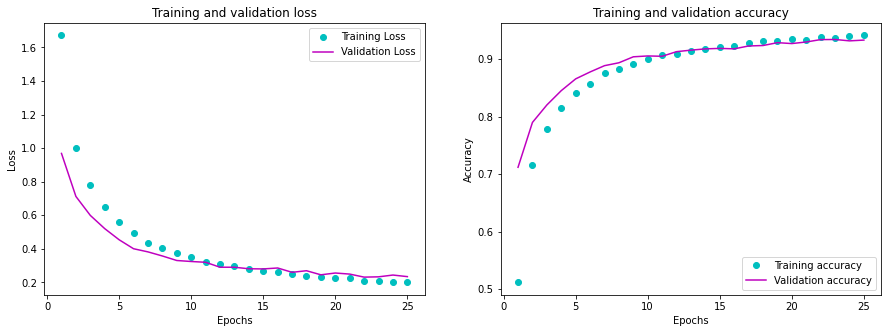

In [20]:
#Adapted from Deep Learning with Python by Francois Chollet, 2018
history_dict=history.history
loss_values=history_dict['loss']
acc_values=history_dict['acc']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_acc']
epochs=range(1,26)   # 51
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'co',label='Training Loss')
ax1.plot(epochs,val_loss_values,'m', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'co', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'m',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

In [ ]:
# Not bad.  Validation set looks pretty good.  Maybe starting to overfit a tiny bit.

In [21]:
preds_val = model.predict(X_val_arr)
res_val = np.argmax(preds_val, axis=1)
print(res_val)

[12  9  3 ... 16  3 10]


In [22]:
# b, c = np.unique(y_test_arr, return_inverse=True)
b, c = np.unique(y_val_arr, return_inverse=True)
# print(classification_report(y_test_arr, res))
print(classification_report(c, res_val))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       501
           1       0.87      0.90      0.88       350
           2       0.92      0.95      0.94      1225
           3       0.95      0.92      0.93       826
           4       0.98      0.94      0.96       900
           5       0.89      0.88      0.89       378
           6       0.97      0.95      0.96       769
           7       0.94      0.92      0.93       470
           8       0.92      0.92      0.92       312
           9       0.97      0.96      0.96      1152
          10       0.91      0.94      0.93      1617
          11       0.94      0.91      0.93       568
          12       0.96      0.93      0.94       713
          13       0.92      0.92      0.92       437
          14       0.88      0.91      0.90       203
          15       0.90      0.95      0.92      1108
          16       0.92      0.93      0.92      1254
          17       0.91    

In [ ]:
# Need to insert the English Titles back into that so the report is easier to read.

In [23]:
res_list_english = []

for i in range(len(y_val_arr)):
    # if (np.argmax(preds[i,:])) < 17:    # , axis=1)) < 17:
        res_list_english.append(b[res_val[i]])

In [24]:
res_list_english

['Pinkfinch',
 'Lesser-Birchbeere',
 'Broad-winged-Jojo',
 'Queenscoat',
 'Vermillion-Trillian',
 'Darkwing-Sparrow',
 'Orange-Pine-Plover',
 'Rose-Crested-Blue-Pipit',
 'Vermillion-Trillian',
 'Pinkfinch',
 'Pinkfinch',
 'Canadian-Cootamum',
 'Queenscoat',
 'Eastern-Corn-Skeet',
 'Bent-beak-Riffraff',
 'Darkwing-Sparrow',
 'Lesser-Birchbeere',
 'Broad-winged-Jojo',
 'Carries-Champagne-Pipit',
 'Broad-winged-Jojo',
 'Ordinary-Snape',
 'Lesser-Birchbeere',
 'Orange-Pine-Plover',
 'Bombadil',
 'Bombadil',
 'Canadian-Cootamum',
 'Queenscoat',
 'Rose-Crested-Blue-Pipit',
 'Canadian-Cootamum',
 'Orange-Pine-Plover',
 'Lesser-Birchbeere',
 'Queenscoat',
 'Green-tipped-Scarlet-Pipit',
 'Orange-Pine-Plover',
 'Bombadil',
 'Green-tipped-Scarlet-Pipit',
 'Queenscoat',
 'Orange-Pine-Plover',
 'Orange-Pine-Plover',
 'Bombadil',
 'Broad-winged-Jojo',
 'Orange-Pine-Plover',
 'Orange-Pine-Plover',
 'Canadian-Cootamum',
 'Queenscoat',
 'Rose-Crested-Blue-Pipit',
 'Lesser-Birchbeere',
 'Rose-Crested-Bl

In [25]:
# Better

print(classification_report(y_val_arr, res_list_english))

                            precision    recall  f1-score   support

        Bent-beak-Riffraff       0.96      0.96      0.96       501
      Blue-collared-Zipper       0.87      0.90      0.88       350
                  Bombadil       0.92      0.95      0.94      1225
         Broad-winged-Jojo       0.95      0.92      0.93       826
         Canadian-Cootamum       0.98      0.94      0.96       900
   Carries-Champagne-Pipit       0.89      0.88      0.89       378
          Darkwing-Sparrow       0.97      0.95      0.96       769
        Eastern-Corn-Skeet       0.94      0.92      0.93       470
Green-tipped-Scarlet-Pipit       0.92      0.92      0.92       312
         Lesser-Birchbeere       0.97      0.96      0.96      1152
        Orange-Pine-Plover       0.91      0.94      0.93      1617
            Ordinary-Snape       0.94      0.91      0.93       568
                 Pinkfinch       0.96      0.93      0.94       713
       Purple-Tooting-Tout       0.92      0.92

In [47]:
res = np.argmax(preds, axis=1)
print(res)

[15 14  1  1  0  0 15 15  3  0 14 14  0  0  0  0  0  0  0  2  2 15 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 16 13  6 16 16 16 16 16  6 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
  6 16 16 11 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  6  2  2 13 13  2
  2  2  2 13  2  2  2  2  2 12 12 12 12 12 17 12 17 17 17 12 17  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8 17
 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17 17 17 17 17 17  9  9  9  9  9  9  9  9  9  9  9 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 14 16  0  0  6  0  0  0 14  0  0 14  0  0  0  6  6  6  6  6  0  6
  6  0  0  0 14  0  0  6  6  6  6  6  6  6  6  6  6  0  0 16 16 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10

In [66]:
(unique, counts) = np.unique(y_val_arr, return_counts=True)
(unique, counts) = np.unique(res_val, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[   0  413]
 [   1  250]
 [   2 1079]
 [   3  745]
 [   4  695]
 [   5  166]
 [   6  771]
 [   7  259]
 [   8  266]
 [   9  977]
 [  10 1057]
 [  11  416]
 [  12  407]
 [  13  290]
 [  14  189]
 [  15  838]
 [  16  774]
 [  17  489]
 [  18  516]]


In [6]:
# Now the preds on the test file
preds = model.predict(X_test_arr)

In [10]:
res = np.argmax(preds, axis=1)
print(res)

[ 5  3  1  1  0  0  3  3  0  0 17  3 17 17  0  0  0  0  0  2  2 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 16  5  5 16 16 16 16 16  5 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 13 16  5 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16  5 11  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  6  2  2 16  2  2
  2  2  2  2  2  2  2  2  2 17 17 17 17 17 17 17 17 17 17 17 17  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8 17
 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17 17 17 17 17 14  9  9  9  9  9  9  9  9  9  9  9 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10  2  0 12  0  0  0  0  0  0  0  0  8  0  0  2  0  2  8  2  0  8
  2  0  0  0  0  0  0  8  0  0  8  0  0  0  0  0  0  8  0  0  0 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10

In [17]:
res

array([ 5,  3,  1,  1,  0,  0,  3,  3,  0,  0, 17,  3, 17, 17,  0,  0,  0,
        0,  0,  2,  2, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16,  5,  5, 16, 16, 16, 16, 16,  5, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 13, 16,  5, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16,  5, 11,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  6,  2,  2, 16,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 14,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16

In [11]:
# (unique, counts) = np.unique(y_val_arr, return_counts=True)
(unique, counts) = np.unique(res, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[  0  52]
 [  1  21]
 [  2  44]
 [  3   4]
 [  4  25]
 [  5   7]
 [  6  58]
 [  8  33]
 [  9  11]
 [ 10  38]
 [ 11   1]
 [ 12  12]
 [ 13   1]
 [ 14   3]
 [ 15   2]
 [ 16 113]
 [ 17  51]]


In [13]:
res_list_english = []

for i in range(len(y_test_arr)):
    # if (np.argmax(preds[i,:])) < 17:    # , axis=1)) < 17:
        res_list_english.append(b[res[i]])

In [15]:
len(res_list_english)

476

This code is to determine WHICH test sites the model thinks are ACTUALLY recordings of the Blue Pipit.

In [23]:
# To determine WHICH of the test files were labeled as BP.  This will tell us WHICH recording number.

# temp = np.vstack((res_list_english, res))
temp = np.vstack((res_list_english, y_test_arr))

test_loc = pd.DataFrame(temp.T, columns = ['Prediction','Num'])

In [27]:
print(test_loc.groupby(['Prediction', 'Num']).size())

Prediction                  Num
Bent-beak-Riffraff          1       9
                            11     30
                            14      1
                            15     12
Blue-collared-Zipper        1       2
                            14     19
Bombadil                    1       2
                            11      5
                            13      1
                            15      2
                            3      21
                            4      13
Broad-winged-Jojo           1       4
Canadian-Cootamum           14     25
Carries-Champagne-Pipit     1       1
                            14      1
                            2       5
Darkwing-Sparrow            13      2
                            14     55
                            3       1
Green-tipped-Scarlet-Pipit  11      6
                            14      1
                            6      26
Lesser-Birchbeere           8      11
Orange-Pine-Plover          10     16
                  

In [19]:
# The Blue Pipit was recorded at spot 2, 9 and 13.

In [25]:
y_test_arr

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9

In [ ]:
# +++++++++++++++++++++++++++
# Random Forest Classifier with these files
# +++++++++++++++++++++++++++

In [2]:
# Load the pickles

X_train = pickle.load(open("X_train_ABCD.pickle", "rb"))
y_train = pickle.load(open("y_train_ABCD.pickle", "rb"))
X_test = pickle.load(open("X_test_ABCD.pickle", "rb"))
y_test = pickle.load(open("y_test_ABCD.pickle", "rb"))

In [29]:
# Split the train set into train/validate - use the val to evaluate.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.20, random_state=999)

X_train_arr = np.array(X_train)
X_test_arr = np.array(X_test)
y_train_arr = np.array(y_train)
y_test_arr = np.array(y_test)
X_val_arr = np.array(X_val)
y_val_arr = np.array(y_val)

In [30]:
# RF requires the data to be flattened

nsamples, nx, ny = X_train_arr.shape
X_train_arr_flat = X_train_arr.reshape((nsamples,nx*ny))
nsamples, nx, ny = X_val_arr.shape
X_val_arr_flat = X_val_arr.reshape((nsamples,nx*ny))
nsamples, nx, ny = X_test_arr.shape
X_test_arr_flat = X_test_arr.reshape((nsamples,nx*ny))

In [31]:
# Now try a simple classifier - Random Forest

clf = RandomForestClassifier(n_estimators = 1000, random_state=42)   
clf.fit(X_train_arr_flat, y_train_arr)
preds_rf = clf.predict(X_val_arr_flat)

In [32]:
print(classification_report(y_val_arr, preds_rf))

                            precision    recall  f1-score   support

        Bent-beak-Riffraff       0.97      0.93      0.95       501
      Blue-collared-Zipper       1.00      0.82      0.90       350
                  Bombadil       0.83      0.96      0.89      1225
         Broad-winged-Jojo       0.93      0.92      0.92       826
         Canadian-Cootamum       0.98      0.92      0.95       900
   Carries-Champagne-Pipit       0.94      0.81      0.87       378
          Darkwing-Sparrow       0.94      0.96      0.95       769
        Eastern-Corn-Skeet       0.96      0.86      0.91       470
Green-tipped-Scarlet-Pipit       0.97      0.89      0.93       312
         Lesser-Birchbeere       0.92      0.94      0.93      1152
        Orange-Pine-Plover       0.84      0.95      0.89      1617
            Ordinary-Snape       0.95      0.83      0.89       568
                 Pinkfinch       0.97      0.91      0.94       713
       Purple-Tooting-Tout       0.99      0.80

In [7]:
# View confusion matrix for test data and predictions
confusion_matrix(y_val_arr, preds_rf)

array([[ 466,    0,    6,    6,    2,    0,    0,    0,    8,    6,   13,
           0,    0,    1,    1,    9,    2,    0,    1],
       [   2,  243,   17,    2,    0,    1,    1,    2,    1,    9,   17,
           2,    0,    0,    0,   10,    4,    1,    1],
       [   0,    0, 1171,   13,    1,    5,    2,    1,    0,    6,    9,
           0,    3,    0,    0,    7,    8,    1,    2],
       [   0,    1,   20,  681,    1,    1,    3,    1,    2,    4,   20,
           1,    6,    2,    1,    1,    2,    3,    5],
       [   0,    0,   17,    3,  729,    0,    5,    2,    0,    4,    7,
           2,    2,    0,    0,    7,    8,    0,    1],
       [   0,    0,   15,    4,    2,  289,    7,    0,    0,    0,    9,
           2,    1,    0,    0,    3,   26,    0,    0],
       [   1,    0,   17,    3,    4,    1,  762,    0,    4,    0,    0,
           1,    1,    0,    0,    3,    1,    0,    0],
       [   1,    1,   22,    0,    1,    2,    5,  386,    1,    2,    6,
         

In [ ]:
# Well that's ugly.  We can do better.

In [10]:
b, c = np.unique(y_val_arr, return_inverse=True)

In [12]:
b

array(['Bent-beak-Riffraff', 'Blue-collared-Zipper', 'Bombadil',
       'Broad-winged-Jojo', 'Canadian-Cootamum',
       'Carries-Champagne-Pipit', 'Darkwing-Sparrow',
       'Eastern-Corn-Skeet', 'Green-tipped-Scarlet-Pipit',
       'Lesser-Birchbeere', 'Orange-Pine-Plover', 'Ordinary-Snape',
       'Pinkfinch', 'Purple-Tooting-Tout', 'Qax', 'Queenscoat',
       'Rose-Crested-Blue-Pipit', 'Scrawny-Jay', 'Vermillion-Trillian'],
      dtype='<U26')

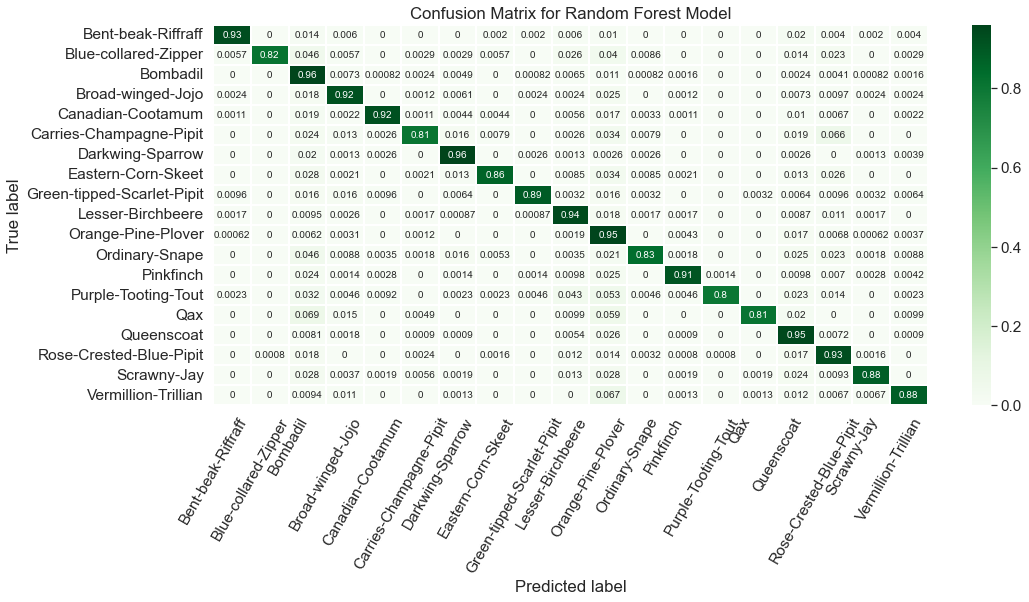

In [11]:
# This one is VERY hard to read.  Try a more graphical heatmap one

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_val_arr, preds_rf)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = b

tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=60)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [33]:
# Great.  SO what's the prediction on the TEST SET?

preds = clf.predict(X_test_arr_flat)

In [13]:
(unique, counts) = np.unique(preds, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[['Bent-beak-Riffraff' '34']
 ['Blue-collared-Zipper' '1']
 ['Bombadil' '107']
 ['Broad-winged-Jojo' '10']
 ['Canadian-Cootamum' '32']
 ['Carries-Champagne-Pipit' '4']
 ['Darkwing-Sparrow' '15']
 ['Eastern-Corn-Skeet' '5']
 ['Green-tipped-Scarlet-Pipit' '26']
 ['Lesser-Birchbeere' '11']
 ['Orange-Pine-Plover' '63']
 ['Ordinary-Snape' '5']
 ['Pinkfinch' '1']
 ['Qax' '3']
 ['Queenscoat' '7']
 ['Rose-Crested-Blue-Pipit' '134']
 ['Scrawny-Jay' '16']
 ['Vermillion-Trillian' '2']]


In [34]:
len(preds)

476

In [35]:
len(y_test_arr)

476

In [36]:
y_test_arr

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9

In [55]:
# To determine WHICH of the test files were labeled as BP

temp = np.vstack((preds, y_test_arr))

test_loc = pd.DataFrame(temp.T, columns = ['Prediction','Num'])

In [56]:
test_loc

,Prediction,Num
0,Queenscoat,1
1,Broad-winged-Jojo,1
2,Broad-winged-Jojo,1
3,Broad-winged-Jojo,1
4,Broad-winged-Jojo,1
...,...,...
471,Bombadil,15
472,Bent-beak-Riffraff,15
473,Orange-Pine-Plover,15
474,Orange-Pine-Plover,15


In [58]:
print(test_loc.groupby(['Prediction', 'Num']).size())

Prediction                  Num
Bent-beak-Riffraff          1       6
                            11     17
                            15     11
Blue-collared-Zipper        1       1
Bombadil                    1       1
                            13      2
                            14     36
                            15      1
                            2       1
                            3      21
                            4      14
                            7      31
Broad-winged-Jojo           1      10
Canadian-Cootamum           11     14
                            14     18
Carries-Champagne-Pipit     14      4
Darkwing-Sparrow            14     14
                            3       1
Eastern-Corn-Skeet          14      4
                            9       1
Green-tipped-Scarlet-Pipit  6      26
Lesser-Birchbeere           8      11
Orange-Pine-Plover          1       1
                            10     16
                            11      7
                  

In [ ]:
# The random forest classifier determined that the BP was present at 2, 9, 14 and 13.

In [14]:
134/476

0.2815126050420168

In [ ]:
# That's 28%. With default RFC params, this predicts 15*.284 = about 4 Blue Pipits

In [ ]:
# Now run it again with 1000 estimators.  See the results again.  Predict the test set again.

                            precision    recall  f1-score   support

        Bent-beak-Riffraff       0.97      0.90      0.93       521
      Blue-collared-Zipper       1.00      0.78      0.87       313
                  Bombadil       0.83      0.95      0.89      1229
         Broad-winged-Jojo       0.91      0.92      0.92       755
         Canadian-Cootamum       0.98      0.94      0.96       787
   Carries-Champagne-Pipit       0.92      0.82      0.87       358
          Darkwing-Sparrow       0.95      0.96      0.95       798
        Eastern-Corn-Skeet       0.96      0.86      0.91       453
Green-tipped-Scarlet-Pipit       0.92      0.90      0.91       295
         Lesser-Birchbeere       0.94      0.93      0.94      1076
        Orange-Pine-Plover       0.85      0.96      0.90      1519
            Ordinary-Snape       0.97      0.83      0.90       499
                 Pinkfinch       0.97      0.90      0.93       661
       Purple-Tooting-Tout       0.99      0.80

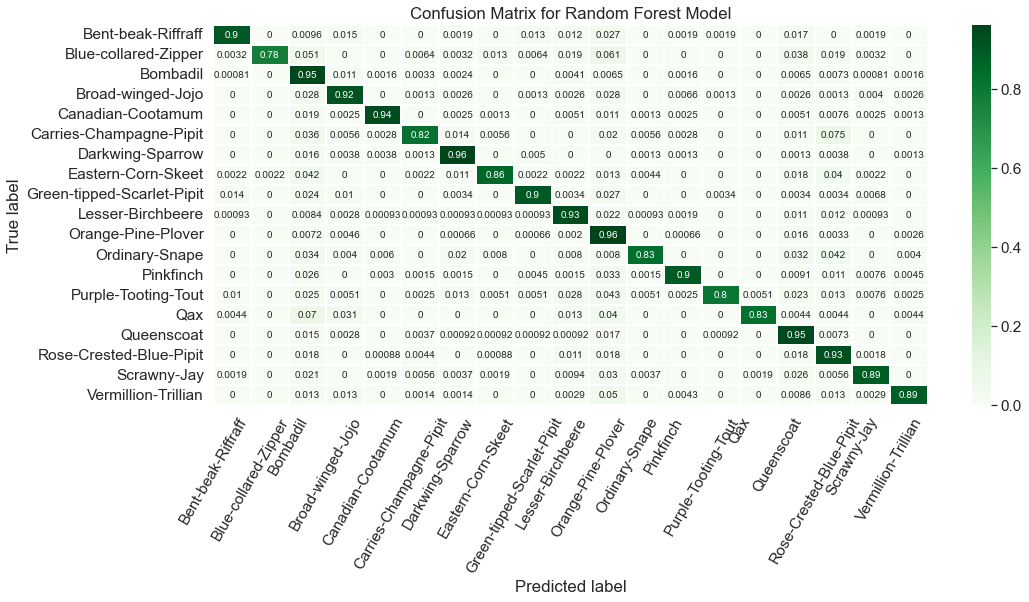

In [22]:
# Now try a simple classifier - Random Forest

clf = RandomForestClassifier(n_estimators = 1000, random_state=42)   
clf.fit(X_train_arr_flat, y_train_arr)
preds_rf = clf.predict(X_val_arr_flat)

print(classification_report(y_val_arr, preds_rf))

# This one is VERY hard to read.  Try a more graphical heatmap one

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_val_arr, preds_rf)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = b

tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=60)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [23]:
preds = clf.predict(X_test_arr_flat)
(unique, counts) = np.unique(preds, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[['Bent-beak-Riffraff' '42']
 ['Blue-collared-Zipper' '1']
 ['Bombadil' '99']
 ['Broad-winged-Jojo' '13']
 ['Canadian-Cootamum' '30']
 ['Carries-Champagne-Pipit' '3']
 ['Darkwing-Sparrow' '14']
 ['Eastern-Corn-Skeet' '6']
 ['Green-tipped-Scarlet-Pipit' '26']
 ['Lesser-Birchbeere' '11']
 ['Orange-Pine-Plover' '57']
 ['Ordinary-Snape' '6']
 ['Qax' '7']
 ['Queenscoat' '7']
 ['Rose-Crested-Blue-Pipit' '134']
 ['Scrawny-Jay' '18']
 ['Vermillion-Trillian' '2']]


In [24]:
134/476

0.2815126050420168

In [ ]:
# Slight improvements in the F1 scores for other species, but little change for the BP
# Still predicting about 4 BPs from the test file.

In [27]:
len(X_train)

56272